### TITLE : ANN LAB <br>
Work : This is the Customer churn prediction project which i made on kaggle platform using ANN <br>
Author : Bhumit Bedse <br>
ID : 19CP012<br>
LINK OF PROJECT : https://www.kaggle.com/code/bhumitbedse12/customer-churn-prediction-using-ann

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

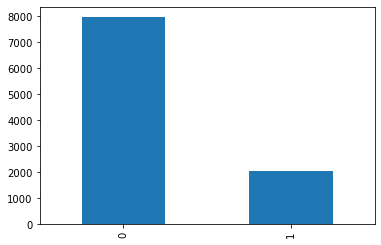

In [9]:
df['Exited'].value_counts().plot(kind='bar')

<AxesSubplot:>

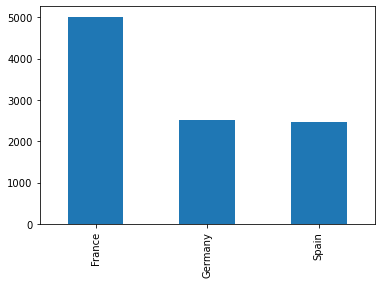

In [10]:
df['Geography'].value_counts().plot(kind='bar')

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
Xtrain_transform = scaler.fit_transform(X_train)
Xtest_transform = scaler.transform(X_test)

In [16]:
Xtrain_transform

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(Xtrain_transform,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.5108 - accuracy: 0.7970 - val_loss: 0.4656 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4529 - accuracy: 0.8009 - val_loss: 0.4381 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4351 - accuracy: 0.8131 - val_loss: 0.4286 - val_accuracy: 0.8138
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4256 - accuracy: 0.8188 - val_loss: 0.4217 - val_accuracy: 0.8194
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4179 - accuracy: 0.8248 - val_loss: 0.4146 - val_accuracy: 0.8256
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8267 - val_loss: 0.4089 - val_accuracy: 0.8275
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4049 - accuracy: 0.8323 - val_loss: 0.4026 - val_accuracy: 0.8294

Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3258 - accuracy: 0.8644 - val_loss: 0.3459 - val_accuracy: 0.8519
Epoch 59/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8647 - val_loss: 0.3459 - val_accuracy: 0.8525
Epoch 60/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8656 - val_loss: 0.3468 - val_accuracy: 0.8519
Epoch 61/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3251 - accuracy: 0.8653 - val_loss: 0.3488 - val_accuracy: 0.8519
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.8667 - val_loss: 0.3470 - val_accuracy: 0.8519
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.8650 - val_loss: 0.3478 - val_accuracy: 0.8525
Epoch 64/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8661 - val_loss: 0.3467 - val_accuracy:

In [22]:
model.layers[0].get_weights()

[array([[ 3.52410555e-01,  3.61466795e-01, -2.37960190e-01,
          2.87027936e-02, -6.53291404e-01, -9.11727324e-02,
          1.14949718e-01, -8.04971457e-02, -2.29192134e-02,
          5.06673753e-01,  7.58708343e-02],
        [ 4.59871769e-01, -1.07146464e-01, -2.10090559e-02,
          3.04801732e-01,  5.50868213e-02,  7.93383300e-01,
         -4.17653829e-01,  1.37288010e+00,  4.65471476e-01,
         -2.62210495e-04, -5.64430475e-01],
        [ 1.15411595e-01, -2.33254820e-01,  6.22822165e-01,
          3.72089058e-01,  1.59787610e-01, -1.70510611e-03,
         -2.44798407e-01,  1.57422662e-01,  1.34643018e-01,
         -4.04387921e-01, -7.57112652e-02],
        [ 4.65608925e-01, -2.06297889e-01, -4.68125135e-01,
         -3.60359810e-02, -1.67179748e-01, -3.27756822e-01,
          2.19813064e-01, -1.80151284e-01,  2.44263172e-01,
         -4.36524600e-01, -7.75678396e-01],
        [ 4.72708821e-01,  8.98039863e-02,  8.17530528e-02,
          2.20872052e-02,  7.10839272e-01, -

In [23]:
model.layers[1].get_weights()

[array([[-0.8765173 , -0.23717585,  0.3479217 , -0.03962481,  0.2083631 ,
          0.7220253 ,  0.49318027, -0.03411349, -0.08771318,  0.51006585,
          0.20897718],
        [ 0.15940885, -0.05887443, -0.10725747,  0.22664815,  0.36373788,
         -0.50063825, -0.76053745, -0.67109764, -0.0743432 , -0.26752815,
         -0.0574228 ],
        [ 0.39418042, -0.41255954,  0.15730074,  0.2889659 , -0.06027862,
         -0.15136728,  0.42730066,  0.28086555,  0.42425194, -0.70263535,
          0.49142826],
        [ 0.45430586, -0.16514276,  0.05577496,  0.29527545,  0.00815756,
         -0.04364419,  0.28192425, -0.43473098,  0.03732852, -0.15188794,
         -0.17626017],
        [-0.18750435, -0.5357139 ,  0.1568331 ,  0.35361984,  0.19077848,
          0.09568902,  0.21057096, -0.70816857, -0.26590008,  0.7611988 ,
         -0.8294383 ],
        [-0.16950792,  0.01349338,  0.686326  , -0.4431897 , -0.24125716,
         -0.14017224, -0.10169157,  0.21702248, -0.16385332,  0.6622196

In [24]:
model.layers[2].get_weights()

[array([[-0.6664043 ],
        [-1.3197027 ],
        [ 0.6930156 ],
        [-0.94875884],
        [-0.77253133],
        [-0.3436619 ],
        [-0.2637795 ],
        [-0.6402942 ],
        [-0.21434696],
        [ 0.8717126 ],
        [ 0.9302092 ]], dtype=float32),
 array([-0.11452831], dtype=float32)]

In [25]:
y_log = model.predict(Xtest_transform)

In [26]:
y_pred = np.where(y_log>0.5,1,0)

In [27]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.8665

In [30]:
history.history

{'loss': [0.510759711265564,
  0.4528643488883972,
  0.43505632877349854,
  0.42563098669052124,
  0.41794630885124207,
  0.41138216853141785,
  0.40493348240852356,
  0.3978797197341919,
  0.38934826850891113,
  0.38091757893562317,
  0.3718333840370178,
  0.36351656913757324,
  0.3574318289756775,
  0.35332733392715454,
  0.3495524227619171,
  0.3467790484428406,
  0.344710111618042,
  0.34243571758270264,
  0.3406651020050049,
  0.33955249190330505,
  0.3382425308227539,
  0.3373399078845978,
  0.3363289535045624,
  0.33543169498443604,
  0.33494606614112854,
  0.3345666527748108,
  0.33358263969421387,
  0.33347946405410767,
  0.33297333121299744,
  0.33195334672927856,
  0.3321281671524048,
  0.3320031464099884,
  0.331589937210083,
  0.3314998745918274,
  0.3311379551887512,
  0.3303607106208801,
  0.3307047188282013,
  0.3303929269313812,
  0.32962313294410706,
  0.330062597990036,
  0.32916364073753357,
  0.3291204571723938,
  0.3290788233280182,
  0.32869186997413635,
  0.3285

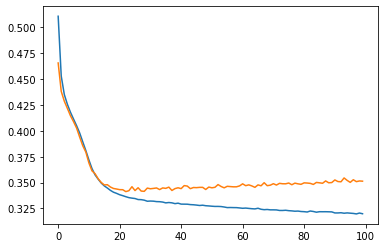

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

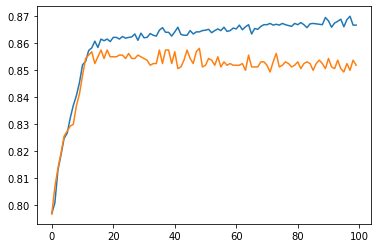

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])